# Projet MonGueuleTon

Nous allons dans ce notebook entrainer un classifieur d'image de nourriture, avec la base de donnée *Food-101*.   

Cette base de donnée est composée de 101 catégories d'images, chacune composés de 1000 exemple d'images.

## Imports

In [5]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json


In [6]:
from fastai import *
from fastai.vision import *

In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Retrieving Data

Run the below commands  if you need to fetch the data.


In [ ]:
!mkdir -p ../data
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz -P ../data
!tar xzf ../data/food-101.tar.gz -C ../data

# Load Data

The data is stored in the "data" folder; one directory above.     
Each of the 101 food categores is stored in its own folder

In [3]:
!ls ../data

food-101  food-101.tar.gz


In [4]:
!ls ../data/food-101/

images	license_agreement.txt  meta  README.txt


The first 5 of the 101 categories

In [5]:
!ls ../data/food-101/images | head -n 5

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare


read the images 

In [20]:
path = Path('../data/food-101/images')


In [22]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=8, bs=64).normalize(imagenet_stats)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

NameError: name 'data' is not defined

## Train Model

# Initialize Rest

In [24]:
learn = create_cnn(data, models.resnet34, metrics=error_rate,pretrained=True)

NameError: name 'data' is not defined

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


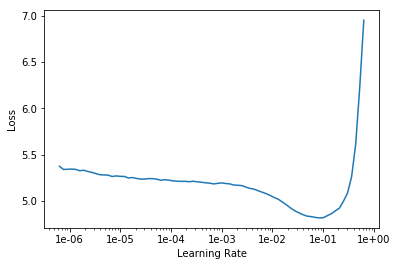

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
#learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="../../prod")
#learn.model = torch.nn.DataParallel(learn.model)


In [12]:
lr = 1e-2

In [13]:
learn.fit_one_cycle(8 , lr)

In [14]:
model_name="resnet34"

In [15]:
learn.save(f'{model_name}-stage-1')

In [16]:
learn.load(f'{model_name}-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (80800 items)
[Category carrot_cake, Category carrot_cake, Category carrot_cake, Category carrot_cake, Category carrot_cake]...
Path: ../data/food-101/images
x: ImageItemList (80800 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 378)]...
Path: ../data/food-101/images;

Valid: LabelList
y: CategoryList (20200 items)
[Category chicken_wings, Category ice_cream, Category cheese_plate, Category baby_back_ribs, Category onion_rings]...
Path: ../data/food-101/images
x: ImageItemList (20200 items)
[Image (3, 512, 512), Image (3, 512, 384), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512)]...
Path: ../data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(in

In [17]:
learn.unfreeze()


In [18]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


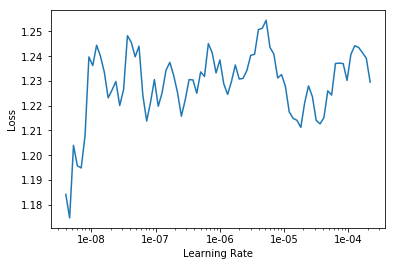

In [19]:
learn.recorder.plot(skip_end=10)


In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))

In [21]:
learn.save(f'{model_name}-stage-2')

In [22]:
learn.load(f'{model_name}-stage-2');

# Interpretation

In [23]:
learn.load(f'{model_name}-stage-2');


In [24]:
interp = ClassificationInterpretation.from_learner(learn)

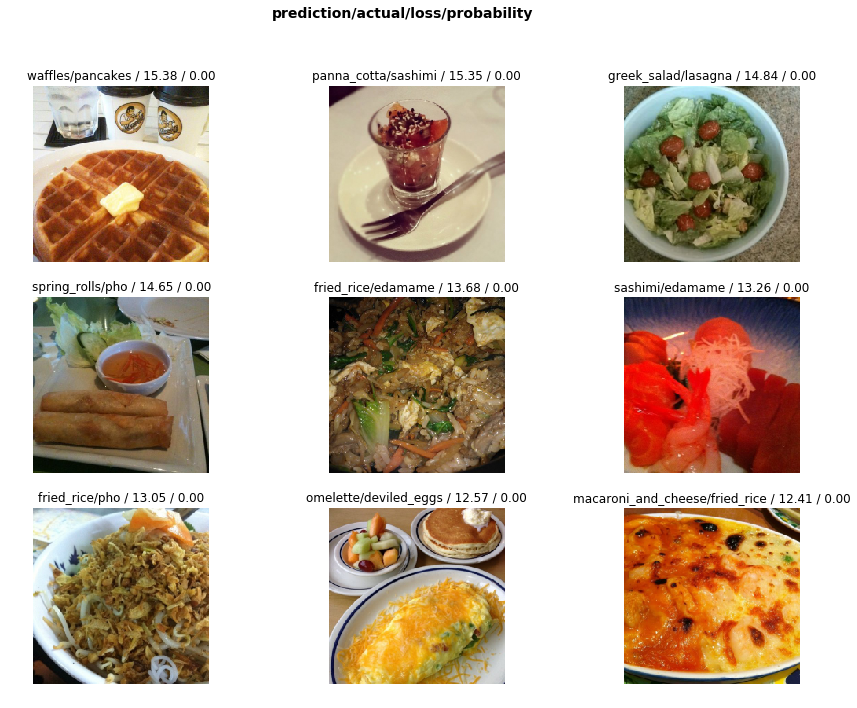

In [25]:
interp.plot_top_losses(9, figsize=(15,11))


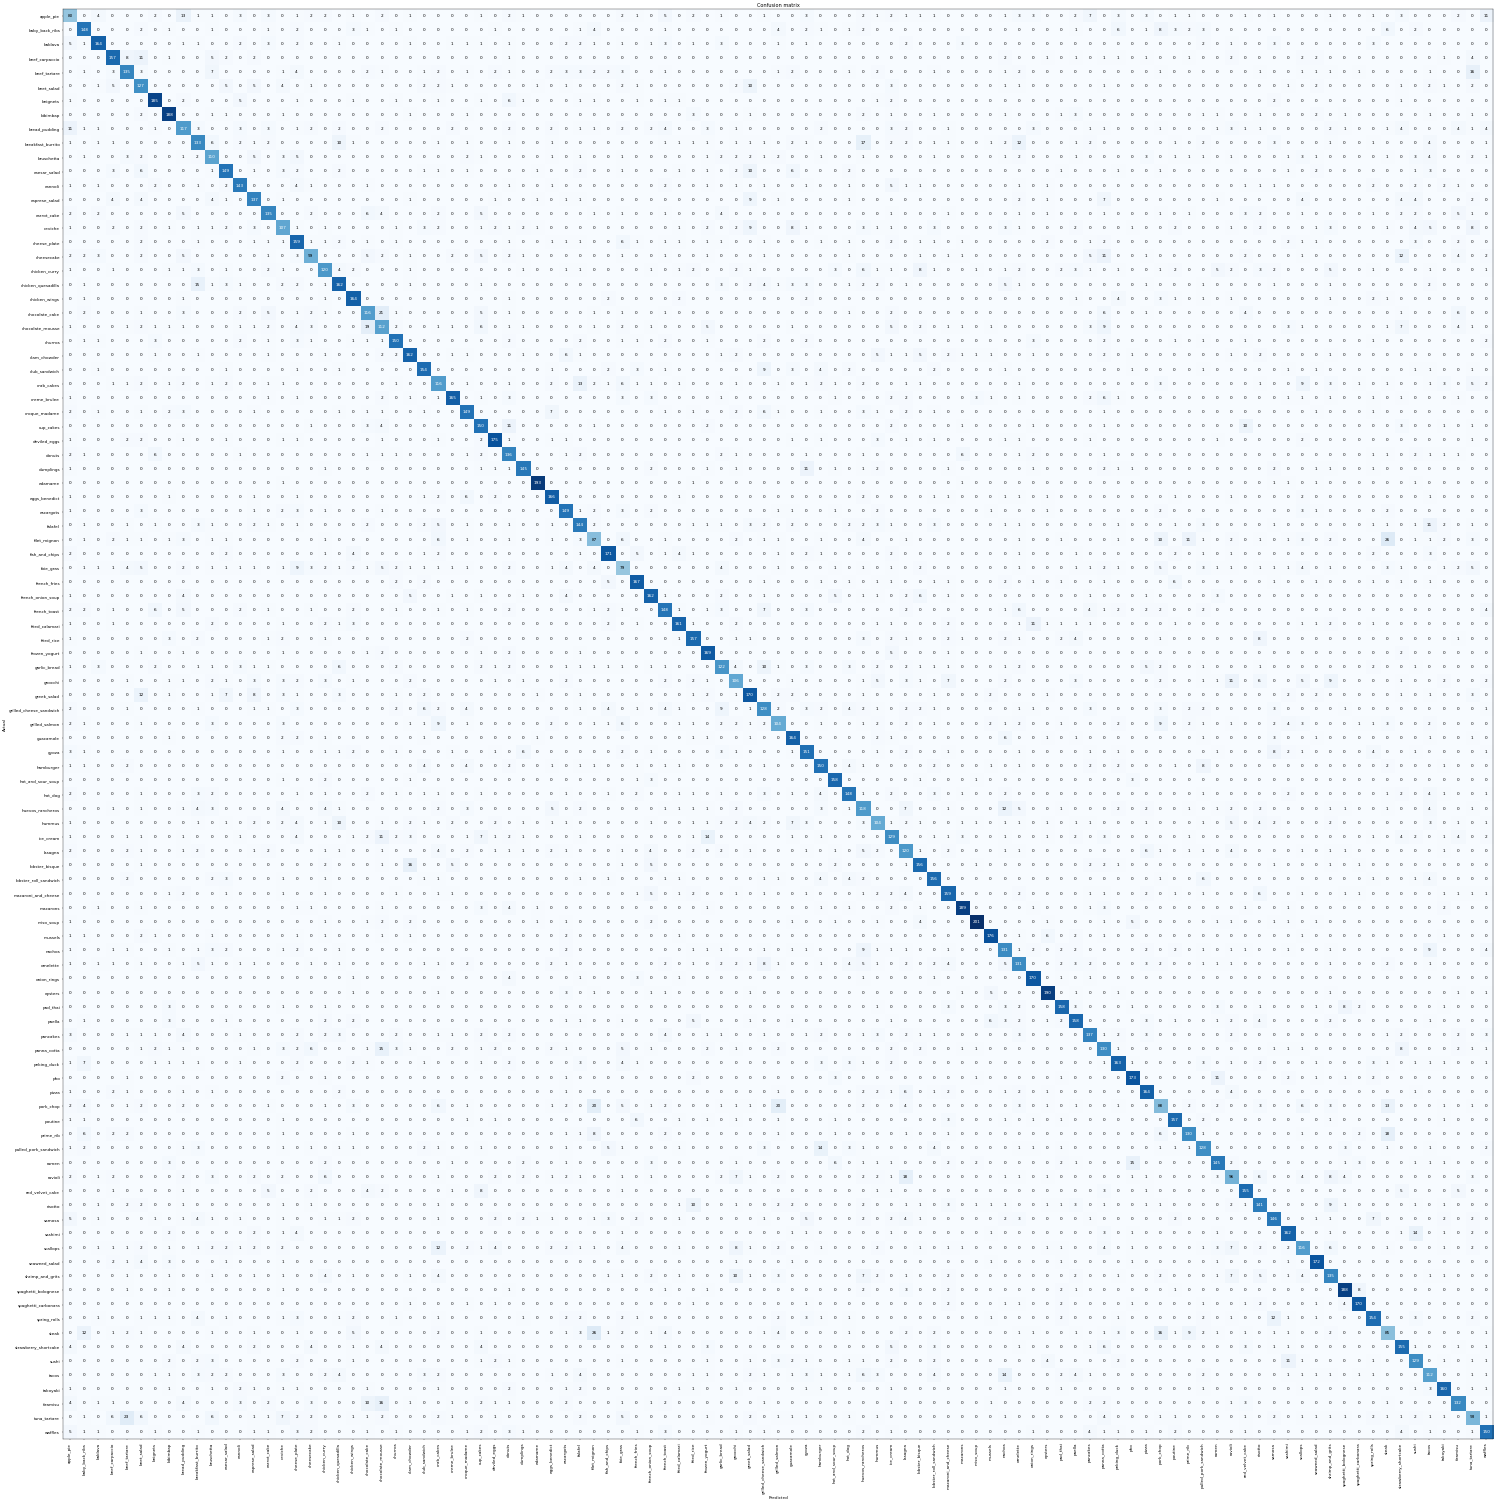

In [26]:
interp.plot_confusion_matrix(figsize=(50,50), dpi=30)


In [27]:
interp.most_confused(min_val=2)


[('filet_mignon', 'steak', 26),
 ('steak', 'filet_mignon', 26),
 ('tuna_tartare', 'beef_tartare', 23),
 ('chocolate_cake', 'chocolate_mousse', 21),
 ('pork_chop', 'filet_mignon', 20),
 ('pork_chop', 'grilled_salmon', 20),
 ('chocolate_mousse', 'chocolate_cake', 19),
 ('prime_rib', 'steak', 18),
 ('ravioli', 'lasagna', 18),
 ('breakfast_burrito', 'huevos_rancheros', 17),
 ('beef_tartare', 'tuna_tartare', 16),
 ('lobster_bisque', 'clam_chowder', 16),
 ('steak', 'pork_chop', 16),
 ('tiramisu', 'chocolate_mousse', 16),
 ('chicken_quesadilla', 'breakfast_burrito', 15),
 ('panna_cotta', 'chocolate_mousse', 15),
 ('ramen', 'pho', 15),
 ('ice_cream', 'frozen_yogurt', 14),
 ('pulled_pork_sandwich', 'hamburger', 14),
 ('sashimi', 'sushi', 14),
 ('tacos', 'nachos', 14),
 ('apple_pie', 'bread_pudding', 13),
 ('crab_cakes', 'falafel', 13),
 ('pork_chop', 'steak', 13),
 ('breakfast_burrito', 'omelette', 12),
 ('cheesecake', 'strawberry_shortcake', 12),
 ('greek_salad', 'beet_salad', 12),
 ('huevos_r

In [28]:
final_model_name = f'{model_name}-final'

In [29]:
learn.save(final_model_name)

# Testing on Different Data

The model 

### Loading Trained model

In [12]:
learn.load("models/model.pkl");

NameError: name 'learn' is not defined

In [33]:
classif = load_learner('', '../models/model.pkl')


In [36]:
img = fetch_image(bibimbap_url)
pred_class,pred_idx,outputs = classif.predict(img)
pred_class , pred_idx, outputs

/Users/sylla/Work/Formation/projet_final/mongueuleton/env_mgt/lib/python3.8/site-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/Users/sylla/Work/Formation/projet_final/mongueuleton/env_mgt/lib/python3.8/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


(Category bibimbap,
 tensor(7),
 tensor([7.2059e-07, 4.5743e-06, 1.4528e-06, 1.1951e-06, 7.3474e-06, 1.9150e-04,
         4.0169e-07, 9.6117e-01, 1.5971e-06, 2.6860e-06, 6.0039e-07, 6.4112e-04,
         2.4607e-07, 8.4043e-07, 6.5252e-06, 5.0666e-05, 6.2694e-07, 3.2140e-07,
         6.4279e-04, 3.5083e-06, 1.3708e-06, 1.5556e-05, 2.6587e-04, 9.6515e-07,
         1.0485e-05, 2.2604e-06, 1.5459e-05, 5.3817e-06, 1.3502e-06, 1.2821e-05,
         2.3028e-06, 3.9687e-07, 4.8500e-04, 1.4036e-05, 1.6579e-07, 1.1641e-04,
         2.8710e-04, 4.6151e-05, 2.1959e-06, 2.4825e-06, 1.7457e-06, 5.2609e-05,
         2.0223e-07, 1.4323e-06, 4.9650e-04, 2.1856e-04, 1.8815e-07, 2.8185e-05,
         2.3865e-04, 2.0001e-06, 1.9478e-05, 1.6615e-02, 1.8972e-06, 5.1984e-06,
         1.8247e-05, 1.0231e-06, 2.3981e-04, 9.0855e-04, 1.3388e-05, 2.0511e-06,
         6.9606e-06, 5.9178e-07, 1.8140e-04, 3.4181e-07, 1.1155e-04, 6.4692e-05,
         2.8337e-05, 1.6675e-05, 2.0350e-07, 7.3743e-07, 8.5490e-05, 2.3430e-

In [38]:
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = classif.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

In [39]:
predict(img)

MissingSchema: Invalid URL 'Image (3, 801, 1200)': No schema supplied. Perhaps you meant http://Image (3, 801, 1200)?

In [31]:
learn.data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [32]:
data2 = ImageDataBunch.single_from_classes(path, data.classes
                                           , tfms=get_transforms()
                                           , size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load(final_model_name)

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (0 items)
[]...
Path: ../data/food-101/images
x: ImageItemList (0 items)
[]...
Path: ../data/food-101/images;

Valid: LabelList
y: CategoryList (0 items)
[]...
Path: ../data/food-101/images
x: ImageItemList (0 items)
[]...
Path: ../data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [33]:
data2.classes, data2.c

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

**bibimbap**

In [29]:
bibimbap_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Dolsot-bibimbap.jpg/1200px-Dolsot-bibimbap.jpg"

In [35]:
#!wget {url} -O sample.jpg

In [30]:
url = bibimbap_url

In [31]:
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

In [10]:
img = fetch_image(bibimbap_url)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class , pred_idx, outputs

NameError: name 'learn' is not defined

In [37]:
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

**Baby Back Rib**

In [40]:
baby_back_url ="https://upload.wikimedia.org/wikipedia/commons/e/ee/Baby_back_ribs_with_fries.jpg"

In [17]:
predict(baby_back_url)

NameError: name 'learn' is not defined

**Cat**

In [42]:
cat_image_url = "https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__480.jpg"

[('ice_cream', 0.3782033324241638),
 ('chocolate_cake', 0.08955799788236618),
 ('chocolate_mousse', 0.04329700767993927),
 ('mussels', 0.03845462203025818),
 ('macarons', 0.02809390425682068)]


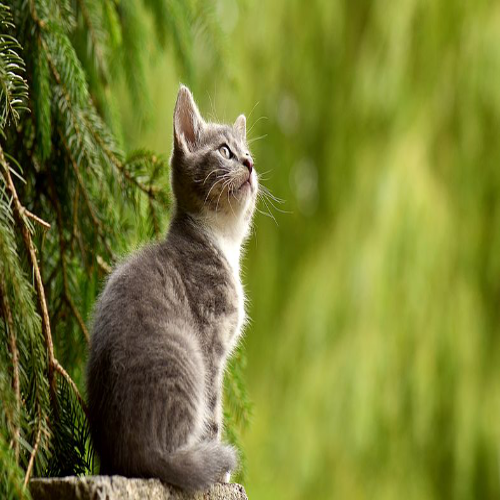

In [43]:
predict(cat_image_url)

**Icecream**

In [44]:
icecream_url = "https://upload.wikimedia.org/wikipedia/commons/3/31/Ice_Cream_dessert_02.jpg"

[('ice_cream', 0.5547614097595215),
 ('frozen_yogurt', 0.3315564692020416),
 ('waffles', 0.039060063660144806),
 ('apple_pie', 0.03056148812174797),
 ('chocolate_mousse', 0.024716483429074287)]


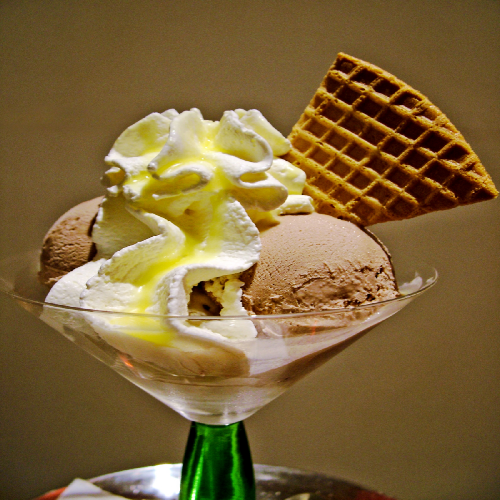

In [45]:
predict(icecream_url)

**Banana**

In [46]:
banana_url = "https://upload.wikimedia.org/wikipedia/commons/d/de/Bananavarieties.jpg"

[('foie_gras', 0.37437957525253296),
 ('cheese_plate', 0.24696765840053558),
 ('caprese_salad', 0.04831501841545105),
 ('samosa', 0.037014905363321304),
 ('peking_duck', 0.03170013427734375)]


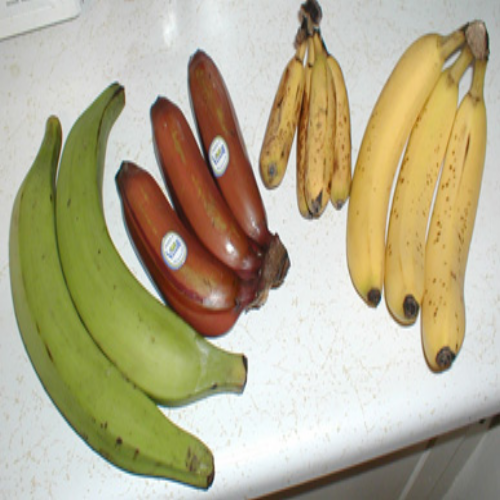

In [47]:
predict(banana_url)

# Prepare for production

To make our model available as a web app, we will need to save:
- final model
- list of class names

Remove existing model artifacts

In [51]:
shutil.rmtree("../models",ignore_errors=True)

Copy the models stored locally to folder above

'/home/ubuntu/projects/food-classifier/notebooks/../models'

In [94]:
final_model_directory = os.getcwd()+ "/../models"
final_model_name='model.pkl'

In [95]:
learn.export(final_model_directory+f"/{final_model_name}")

In [87]:
!pwd

/home/ubuntu/projects/food-classifier/notebooks


Save the list of classes

In [67]:
with open('../models/classes.txt', 'w') as f:
    json.dump(learn.data.classes,f)

In [54]:
!pwd

/home/ubuntu/projects/food-classifier/notebooks


# Load 

In [96]:
learn3= load_learner(final_model_directory,final_model_name)

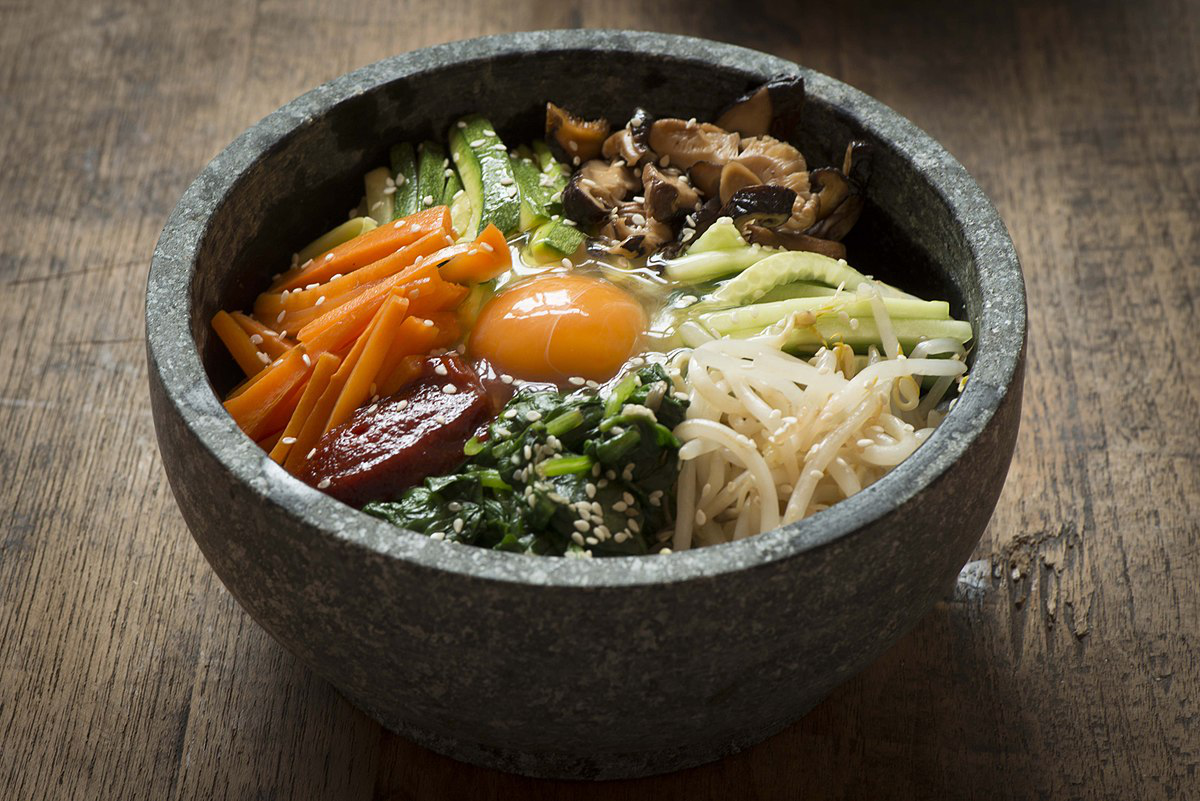

In [100]:
img

In [99]:
learn3.predict(img)

(Category bibimbap,
 tensor(7),
 tensor([7.9646e-07, 4.5580e-06, 1.5296e-06, 1.2509e-06, 8.7913e-06, 2.4522e-04,
         4.5393e-07, 9.5558e-01, 1.7174e-06, 3.3974e-06, 7.6976e-07, 6.4425e-04,
         3.2325e-07, 1.1164e-06, 7.3624e-06, 8.5419e-05, 7.8974e-07, 3.9314e-07,
         7.9545e-04, 4.2051e-06, 1.4746e-06, 1.8886e-05, 3.5605e-04, 1.1198e-06,
         1.6324e-05, 2.4728e-06, 1.6591e-05, 7.6081e-06, 1.4518e-06, 1.5057e-05,
         2.5960e-06, 5.3018e-07, 5.1174e-04, 1.7958e-05, 1.9048e-07, 1.6904e-04,
         2.7631e-04, 5.3418e-05, 2.0619e-06, 3.5094e-06, 1.8902e-06, 6.2659e-05,
         2.5408e-07, 1.4159e-06, 6.8474e-04, 2.4911e-04, 2.1151e-07, 3.5693e-05,
         3.0563e-04, 2.1286e-06, 2.2200e-05, 1.9116e-02, 1.7199e-06, 4.7683e-06,
         2.4722e-05, 1.1216e-06, 2.2922e-04, 1.0237e-03, 1.2317e-05, 1.7914e-06,
         9.4212e-06, 5.8267e-07, 1.8509e-04, 4.4426e-07, 1.4893e-04, 1.1100e-04,
         2.5303e-05, 1.7505e-05, 1.8094e-07, 9.3376e-07, 9.4870e-05, 3.3305e-

## Next Steps

Refer to this [guide](https://github.com/npatta01/food-classifier/blob/master/docs/2_heroku_app.md) to deploy the model on heroku